This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

해당 코드는 MNIST 데이터셋에서 가져온 train_images와 train_labels를 전처리하는 코드입니다.

먼저, mnist.load_data() 함수를 사용하여 MNIST 데이터셋을 로드합니다. 이 함수는 (train_images, train_labels), (test_images, test_labels) 형태의 튜플을 반환합니다. 하지만 해당 코드에서는 테스트 데이터를 사용하지 않으므로 두번째 튜플인 (test_images, test_labels)는 _ 변수로 무시됩니다.

다음으로, train_images를 28x28 형태에서 784x1 형태의 벡터로 변환합니다. 이를 위해 reshape() 함수를 사용합니다.

그리고 train_images를 0~1 사이의 실수(float32) 값으로 변환하고, train_images_with_noise_channels 변수에는 train_images와 같은 크기의 무작위 노이즈(784개의 채널)를 가진 배열을 이어붙여서 만듭니다. 이를 위해 np.concatenate() 함수를 사용합니다. 이렇게 만든 train_images_with_noise_channels 변수는 노이즈가 추가된 이미지 데이터셋입니다.

마지막으로, train_images_with_zeros_channels 변수에는 train_images와 같은 크기의 0 값을 가진 배열을 이어붙여서 만듭니다. 이 역시 np.concatenate() 함수를 사용하여 만듭니다. 이렇게 만든 train_images_with_zeros_channels 변수는 흑백 이미지 데이터셋에서 모든 채널이 0인 데이터셋입니다.

따라서, 해당 코드는 MNIST 데이터셋에서 가져온 train_images를 전처리하여 노이즈가 추가된 이미지 데이터셋과 모든 채널이 0인 이미지 데이터셋을 만드는 코드입니다.

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6022 - accuracy: 0.8141 - val_loss: 0.4221 - val_accuracy: 0.8703
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9205 - val_loss: 0.1880 - val_accuracy: 0.9402
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1664 - accuracy: 0.9489 - val_loss: 0.1750 - val_accuracy: 0.9450
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1197 - accuracy: 0.9629 - val_loss: 0.1357 - val_accuracy: 0.9606
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9713 - val_loss: 0.1292 - val_accuracy: 0.9610
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.1463 - val_accuracy: 0.9611
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.1366 - val_accuracy: 0.9616
Epoch 

해당 코드는 전처리된 MNIST 데이터셋을 사용하여 모델을 학습시키는 코드입니다.

먼저, get_model() 함수를 호출하여 모델을 생성합니다. 이 모델은 두 개의 Dense 레이어를 가지며, 첫 번째 레이어는 512개의 뉴런을 가진 완전 연결 레이어이며, 활성화 함수로는 ReLU를 사용합니다. 두 번째 레이어는 10개의 뉴런을 가진 완전 연결 레이어이며, 활성화 함수로는 소프트맥스를 사용합니다.

모델의 컴파일 단계에서는 rmsprop 옵티마이저를 사용하여 모델을 컴파일하며, sparse_categorical_crossentropy 손실 함수를 사용합니다. 또한, accuracy 메트릭을 사용하여 모델의 정확도를 평가합니다.

이후, model.fit() 함수를 사용하여 모델을 학습시킵니다. train_images_with_noise_channels나 train_images_with_zeros_channels 데이터셋을 입력값으로 사용하며, train_labels을 정답으로 사용합니다. epochs 인자는 전체 데이터셋에 대한 학습 횟수를 지정하며, batch_size 인자는 한 번에 처리할 데이터의 크기를 지정합니다. validation_split 인자는 검증 데이터셋으로 사용할 비율을 지정합니다. 이 함수는 모델 학습의 손실(loss)과 정확도(accuracy)를 기록한 history 객체를 반환합니다.

따라서, 해당 코드는 노이즈가 추가된 이미지 데이터셋과 모든 채널이 0인 이미지 데이터셋을 사용하여 모델을 학습시키는 코드입니다.

**Plotting a validation accuracy comparison**

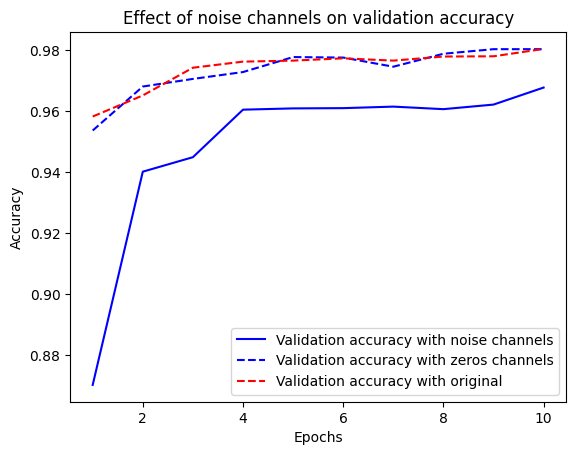

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3150 - accuracy: 0.1038 - val_loss: 2.3053 - val_accuracy: 0.1049
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1129 - val_loss: 2.3124 - val_accuracy: 0.1038
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2907 - accuracy: 0.1274 - val_loss: 2.3128 - val_accuracy: 0.0977
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2784 - accuracy: 0.1404 - val_loss: 2.3274 - val_accuracy: 0.1066
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2626 - accuracy: 0.1500 - val_loss: 2.3366 - val_accuracy: 0.1065
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2438 - accuracy: 0.1661 - val_loss: 2.3495 - val_accuracy: 0.0996
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2194 - accuracy: 0.1786 - val_loss: 2.3616 - val_accuracy: 0.1008

위 코드는 MNIST 데이터셋으로 모델을 학습시키는 코드입니다. 학습 데이터인 train_images는 (60000, 784) 크기로 reshape되고, 각 픽셀 값은 0에서 255 사이의 값에서 0에서 1 사이의 값으로 스케일링됩니다.

그 다음 코드에서 train_labels의 복사본을 만들고, 이를 np.random.shuffle() 함수를 사용하여 임의로 섞은 random_train_labels로 대체합니다. 이렇게 함으로써, 학습 데이터의 레이블이 무작위로 섞여 모델이 학습하는 과정에서 레이블의 순서가 변하게 됩니다.

마지막으로, 모델의 구조를 정의하고 컴파일한 후, fit() 함수를 호출하여 모델을 학습시킵니다. fit() 함수는 train_images와 random_train_labels를 입력으로 받아서, 이를 사용하여 모델을 학습합니다. epochs와 batch_size는 각각 에포크 수와 배치 크기를 의미하며, validation_split은 검증 데이터셋을 사용할 비율을 의미합니다. 즉, 전체 학습 데이터 중 20%를 검증 데이터셋으로 사용합니다.

이 모델은 100번의 에포크 동안 학습됩니다.

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

"Key gradient descent parameters"란 경사 하강법(gradient descent) 알고리즘에서 중요한 역할을 하는 하이퍼파라미터(hyperparameters)들을 의미합니다. 예를 들어, 학습률(learning rate), 배치 크기(batch size), 에포크 수(epochs) 등이 이에 해당합니다.

"Tuning"이란 이러한 하이퍼파라미터를 적절하게 조정하여 모델의 성능을 최적화하는 것을 말합니다. 이는 모델의 학습 속도, 일반화 능력, 과적합(overfitting) 등에 영향을 미칩니다. 따라서, 경사 하강법 알고리즘에서 이러한 하이퍼파라미터들을 적절히 조정하는 것은 모델의 최종 성능을 향상시키는 중요한 요소 중 하나입니다.

**Training a MNIST model with an incorrectly high learning rate**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 528.5719 - accuracy: 0.2982 - val_loss: 2.4493 - val_accuracy: 0.2065
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7374 - accuracy: 0.1985 - val_loss: 2.2469 - val_accuracy: 0.2319
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4120 - accuracy: 0.1930 - val_loss: 2.2688 - val_accuracy: 0.1891
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6293 - accuracy: 0.1906 - val_loss: 3.2025 - val_accuracy: 0.2025
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5693 - accuracy: 0.1902 - val_loss: 2.2559 - val_accuracy: 0.1981
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3177 - accuracy: 0.1894 - val_loss: 2.1156 - val_accuracy: 0.1873
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4248 - accuracy: 0.1809 - val_loss: 2.3140 - val_accuracy: 0.1709
Epoc

**The same model with a more appropriate learning rate**

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3411 - accuracy: 0.9123 - val_loss: 0.1316 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9650 - val_loss: 0.1441 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9749 - val_loss: 0.1561 - val_accuracy: 0.9661
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9800 - val_loss: 0.1655 - val_accuracy: 0.9703
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9830 - val_loss: 0.1929 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9852 - val_loss: 0.1830 - val_accuracy: 0.9714
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9869 - val_loss: 0.1947 - val_accuracy: 0.9712
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6541 - accuracy: 0.8420 - val_loss: 0.3593 - val_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.9028 - val_loss: 0.3092 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.9119 - val_loss: 0.2938 - val_accuracy: 0.9186
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9161 - val_loss: 0.2855 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9181 - val_loss: 0.2782 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9208 - val_loss: 0.2744 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9217 - val_loss: 0.2706 - val_accuracy: 0.9265
Epoch 

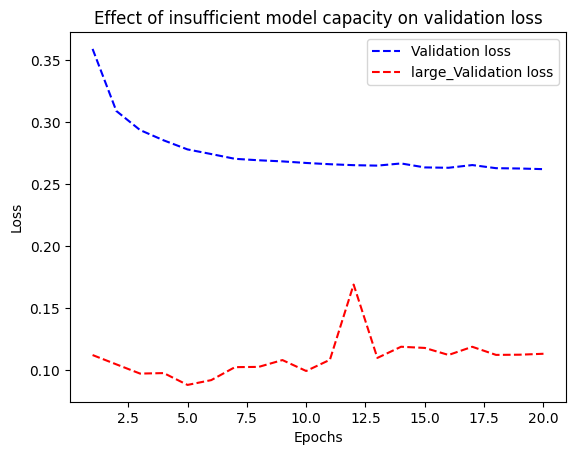

In [11]:
import matplotlib.pyplot as plt
val_loss_S = history_small_model.history["val_loss"]
val_loss_L = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_S, "b--",
         label="Validation loss")
plt.plot(epochs, val_loss_L, "r--",
         label="large_Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [12]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3792 - accuracy: 0.8946 - val_loss: 0.2100 - val_accuracy: 0.9394
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1707 - accuracy: 0.9490 - val_loss: 0.1758 - val_accuracy: 0.9481
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9647 - val_loss: 0.1128 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.1095 - val_accuracy: 0.9678
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0727 - accuracy: 0.9772 - val_loss: 0.1058 - val_accuracy: 0.9678
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0964 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.1028 - val_accuracy: 0.9699
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5443 - accuracy: 0.7741 - val_loss: 0.4209 - val_accuracy: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3508 - accuracy: 0.8892 - val_loss: 0.3343 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2608 - accuracy: 0.9165 - val_loss: 0.2897 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2130 - accuracy: 0.9287 - val_loss: 0.2837 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1778 - accuracy: 0.9411 - val_loss: 0.3333 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1532 - accuracy: 0.9499 - val_loss: 0.2799 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1329 - accuracy: 0.9566 - val_loss: 0.2916 - val_accuracy: 0.8874
Epoch 8/20
30

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.6287 - accuracy: 0.6302 - val_loss: 0.5820 - val_accuracy: 0.7209
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5454 - accuracy: 0.7609 - val_loss: 0.5353 - val_accuracy: 0.7707
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4966 - accuracy: 0.8249 - val_loss: 0.5057 - val_accuracy: 0.8486
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4600 - accuracy: 0.8686 - val_loss: 0.4867 - val_accuracy: 0.8385
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4321 - accuracy: 0.8937 - val_loss: 0.4704 - val_accuracy: 0.8627
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4081 - accuracy: 0.9149 - val_loss: 0.4641 - val_accuracy: 0.8583
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3873 - accuracy: 0.9287 - val_loss: 0.4515 - val_accuracy: 0.8810
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5735 - accuracy: 0.7111 - val_loss: 0.3518 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3340 - accuracy: 0.8659 - val_loss: 0.4634 - val_accuracy: 0.7973
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2441 - accuracy: 0.9022 - val_loss: 0.2664 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1838 - accuracy: 0.9299 - val_loss: 0.3923 - val_accuracy: 0.8529
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1410 - accuracy: 0.9453 - val_loss: 0.3068 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1014 - accuracy: 0.9647 - val_loss: 0.4864 - val_accuracy: 0.8385
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1039 - accuracy: 0.9620 - val_loss: 0.3104 - val_accuracy: 0.8854
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6453 - accuracy: 0.7624 - val_loss: 0.5077 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4426 - accuracy: 0.8847 - val_loss: 0.4210 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3639 - accuracy: 0.9036 - val_loss: 0.3817 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3173 - accuracy: 0.9213 - val_loss: 0.3618 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2921 - accuracy: 0.9279 - val_loss: 0.3673 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2742 - accuracy: 0.9323 - val_loss: 0.3576 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2605 - accuracy: 0.9376 - val_loss: 0.3714 - val_accuracy: 0.8802
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6590 - accuracy: 0.6007 - val_loss: 0.5532 - val_accuracy: 0.8221
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5406 - accuracy: 0.7398 - val_loss: 0.4161 - val_accuracy: 0.8679
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4528 - accuracy: 0.8016 - val_loss: 0.3480 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3892 - accuracy: 0.8435 - val_loss: 0.3062 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3371 - accuracy: 0.8685 - val_loss: 0.2883 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2975 - accuracy: 0.8892 - val_loss: 0.2883 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2636 - accuracy: 0.9066 - val_loss: 0.2743 - val_accuracy: 0.8907
Epoch 8/20
30

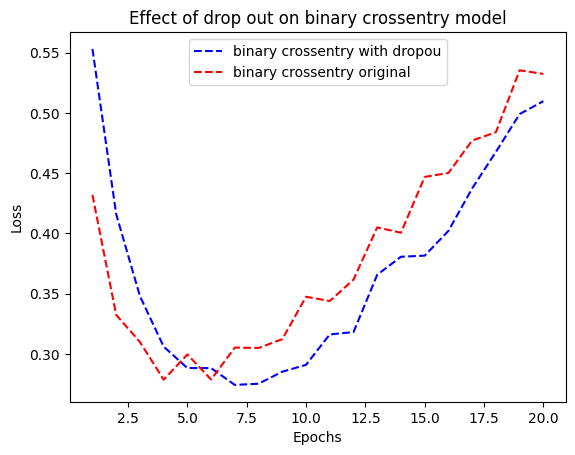

In [21]:
import matplotlib.pyplot as plt
val_loss1 = history_dropout.history["val_loss"]
val_loss2 = history_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss1, "b--",
         label="binary crossentry with dropou")
plt.plot(epochs, val_loss2, "r--",
         label="binary crossentry original")
plt.title("Effect of drop out on binary crossentry model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

위 코드는 3개의 layers로 구성된 딥 뉴럴 네트워크 모델을 생성하고, 각각 ReLU와 sigmoid 활성화 함수를 사용합니다. 이 모델은 "binary_crossentropy" 손실함수와 "accuracy" 메트릭을 사용하여 컴파일되었으며, train_data와 train_labels 데이터셋을 사용하여 20번의 에포크 동안 학습됩니다.

이 모델에서 Dropout 레이어가 추가되었습니다. Dropout은 과적합을 방지하기 위한 효과적인 기법 중 하나로, 특정 뉴런을 임의로 삭제하여 일부 특징들이 더 강제로 표현되도록 하여 모델이 더욱 일반화될 수 있도록 돕습니다. 이 모델에서는 dropout 비율이 0.5로 설정되었으며, 각 Dense 레이어 뒤에 추가되어 해당 레이어의 출력값에 대해 50%의 뉴런이 무작위로 제거됩니다.

마지막으로 모델은 40%의 검증 데이터를 사용하여 모델이 얼마나 잘 일반화되었는지 모니터링합니다. 각 에포크의 손실과 정확도 값은 history_dropout 객체에 저장됩니다.

## Summary